In [194]:
# -*- coding: utf-8 -*-
csvfile_path = '/Users/serratus/Downloads/Ни шиша - все вместе.csv'
import pandas
import matplotlib.pyplot as plt
import numpy as np
data = pandas.read_csv(csvfile_path)# засунь содержимое файла в датафрейм 
# поправить даты, чтоб они были в одном формате и чтоб с ними можно было обращаться как с числами

data['date_'] = data['date'].map(lambda s: 2020 if s == "2000+" else s) 
data.set_value(30, 'date_',2001)
data['date_'] = pandas.to_numeric(data['date_'])
data['date_'] = data['date_'].fillna(1840) # примеры с неизвестной датой мы метим 1840-м годом. можно будет отрезать начало списка, когда мы рисуем график

data['semantics+_'] = data['semantics+'].fillna('')

years = sorted(list(data['date_'].unique()))
types = list(data['semantics+_'].unique())

####
# print(types, years)

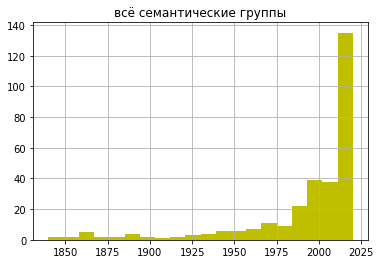

NameError: name 'ts' is not defined

In [195]:
#data[['semantics+_', 'date_']].plot()
data['date_'].hist(bins=20, color='y')
plt.title('всё семантические группы')
plt.show()
for t in types:
    ts.append(data['date_'][data['semantics+']==t][1844 <= data['date_']])
    data[['date_', 'semantics+_']][data['semantics+']==t][1844 <= data['date_']].hist(bins=20)
    plt.title(t)
    plt.show()
    

In [ ]:
n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, normed=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, normed=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()
#ts.hist()

In [ ]:
semantic_types = data['semantics+_'].unique()
for t in semantic_types:
    #data[data['semantics+_']==t]
#     print(data[data['semantics+_']==t])
    print("#", '='*80, "#", "here's", t)
    for r in data[data['semantics+_']==t]:
        print(r)
    

In [209]:
# # Как посмотреть на наши данные? Как итерироваться по примерам в цикле?
# # Взять каждую строчку (между третьей и шестой) как кортеж (tuple):
for r in data[3:6].itertuples():
    print(r, "\n", r[10])
    

# # Взять каждую строчку (между третьей и шестой) как объект типа Pandas.Series:    
for r in data[3:6].iterrows():
    print(r, "\n")    
    

Pandas(Index=3, _1='а въ коммерціи я, извините,', _2=nan, n='ни шиша', _4='не смыслю.', _5='смыслю', source='Гр. А.. Кушелев-Безбородко,Григорий Евлампиевич Благосветлов. Русское слово, Том 1 ', date='1859', _8='r', predicat='смыслить', extra=nan, semantics=nan, _12='понимать', tense='present', person=1.0, number=1.0, form=nan, date_=1859.0, _18='понимать') 
 nan
Pandas(Index=4, _1='― Был, брат, я у этих господ; звали они меня к себе, ― сказал Замин, ― баря добрые; только я вам скажу, ', _2=nan, n='ни шиша', _4='нашего простого народа не понимают : пейзанчики у них все в голове - ей-богу, а не то, что наш мужичок, ― с деготьком да луком. ', _5='понимают', source='А. Ф. Писемский. Люди сороковых годов', date='1869', _8='r', predicat='понимать', extra=nan, semantics=nan, _12='понимать', tense='present', person=3.0, number=2.0, form=nan, date_=1869.0, _18='понимать') 
 nan
Pandas(Index=5, _1=nan, _2=nan, n='Ни шиша', _4=', грю, не понимаю. Чего б, мол, тебе по нашему - как я, говорить? ',

In [210]:
# making a dict of dicts
years = data['date_'].unique()
years_dict = dict((lambda l: [(x, 0) for x in l])(data['date_'].unique()))
types_x_years_dict = dict((lambda l: [(x, years_dict.copy()) for x in l])(data['semantics+_'].unique()))


In [211]:
# an ndarray
years = data['date_'].unique()
years_x_types_ndarray = np.zeros(shape=(len(years),len(types)))
years_x_types_ndarray.shape
years_x_types_ndarray[0,0] 
years_ndarray = np.zeros(shape=(len(years)))

In [212]:
#data.fillna('NaN') # turn numpy.nan into a string wherever it occurs
#pandas.DataFrame() #how do I make a new dataframe with columns from types and rows from years?
for t in data['semantics+_'].unique():
    for r in data[data['semantics+_']==t].itertuples(): # data['semantics+_']==t делает маску, внешняя data[...] этой маской выбирает нужные строки, а itertuples() позволяет брать строки по одной, итерируясь по датафрейму как по списку collections.namedtuple, а просто так по датафрейму итерироваться нельзя 
        print(r)
        y = r.date_
        types_x_years_dict[t][y] += 1
        years_dict[y] += 1

Pandas(Index=0, _1='Из всей их беседы не извлек я', _2='извлек', n='ни шиша', _4='.', _5=nan, source='А. В. Дружинин. Дневник', date='1845', _8='l', predicat='извлечь', extra=nan, semantics=nan, _12='понимать', tense='present', person=3.0, number=1.0, form=nan, date_=1845.0, _18='понимать')
Pandas(Index=1, _1='Жаль Сая, а что же будет с новым главнокомандующим, генерал-губернатором Гуандуна, который при 60 с лишком своих который при 60 с лишком своих лет шарлатанит о победах, а в военном деле не смыслит', _2='смыслит', n='ни шиша', _4='.', _5=nan, source='К. А. Скачков. Мой дневник', date='1852', _8='l', predicat='смыслить', extra=nan, semantics=nan, _12='понимать', tense='present', person=3.0, number=1.0, form=nan, date_=1852.0, _18='понимать')
Pandas(Index=2, _1='Впрочем, я', _2=nan, n='ни шиша', _4='не смыслю в моей болезни и не знаю наверно, что у меня болит. ', _5='смыслю', source='Ф. М. Достоевский. Записки из подполья', date='1864', _8='r', predicat='смыслить', extra=nan, semant

In [213]:
# Галка, [27 Apr 2017, 0:41]:
# 1. отрисовать частотность по годам от всей выборки за опр. период, например 15 лет или просто частотность на худой конец
#   1. Собираем даты по типам:
#     Для каждого семантического типа:
years = data['date_'].unique()
year_nums=dict(zip(years,range(len(years))))
types = data['semantics+_'].unique()
type_nums=dict(zip(types,range(len(types))))

print(type_nums)
#types_by_year = map(lambda y: (y, 0))
#types_x_years = dict(data['semantics+_'].unique())
#FIXME: data.fillna('NaN') # turn numpy.nan into a string wherever it occurs
pandas.DataFrame() #how do I make a new dataframe with columns from types and rows from years?
for t in data['semantics+_'].unique():
#       Для примера этого семантического типа:
    for r in data[data['semantics+_']==t].itertuples(): # data['semantics+_']==t делает маску, внешняя data[...] этой маской выбирает нужные строки, а itertuples() позволяет брать строки по одной, итерируясь по датафрейму как по списку collections.namedtuple, а просто так по датафрейму итерироваться нельзя 
        y = r.date_
#         Если такая дата есть в списке дат этого листа:
                # I could do it with a list of lists, with a dict, with a ndarray or with a dataframe.
                # let me try a dict of dicts:
#           значение даты += 1
#           значение даты в общем списке дат += 1
        tn = type_nums[t]
        yn = year_nums[y]
        years_x_types_ndarray[yn][tn] += 1
        years_ndarray[yn] += 1
        print(t, y, years_x_types_ndarray[yn][tn])
    print('='*80)
    print(years,years_ndarray)
        
#         Если такой даты нет в списке дат этого листа:
#           добавить дату в список, приравняв её значение одному
#           Если такой даты нет в общем списке дат:
#             добавить дату в список, приравняв её значение одному

#   2. Нарисовать график:
#     По одной оси -   года, по другой - число примеров
#     График отдельного цвета/рисунка для каждой семантической группы (кроме стоить - она очень маленькая)


{'понимать': 0, 'воспринимать': 1, 'обладать': 2, 'обладать абс': 3, 'стоить': 4, 'делать': 5, 'пр': 6, '': 7}
понимать 1845.0 1.0
понимать 1852.0 1.0
понимать 1864.0 1.0
понимать 1859.0 1.0
понимать 1869.0 1.0
понимать 1913.0 1.0
понимать 1924.0 1.0
понимать 1941.0 1.0
понимать 1955.0 1.0
понимать 1956.0 1.0
понимать 1956.0 2.0
понимать 1961.0 1.0
понимать 1965.0 1.0
понимать 1968.0 1.0
понимать 1977.0 1.0
понимать 1968.0 2.0
понимать 1971.0 1.0
понимать 1981.0 1.0
понимать 1984.0 1.0
понимать 1984.0 2.0
понимать 1985.0 1.0
понимать 1987.0 1.0
понимать 1996.0 1.0
понимать 1996.0 2.0
понимать 1997.0 1.0
понимать 1997.0 2.0
понимать 1997.0 3.0
понимать 1998.0 1.0
понимать 1999.0 1.0
понимать 1999.0 2.0
понимать 2001.0 1.0
понимать 2000.0 1.0
понимать 2000.0 2.0
понимать 2003.0 1.0
понимать 2005.0 1.0
понимать 2008.0 1.0
понимать 2009.0 1.0
понимать 2010.0 1.0
понимать 2011.0 1.0
понимать 2011.0 2.0
понимать 2011.0 3.0
понимать 2011.0 4.0
понимать 2011.0 5.0
понимать 2012.0 1.0
понимать 

In [215]:
# nope, can't plot a dict of dicts.
# let's turn it into a list of lists first, then an numpy.n-dimensional array:

list_of_lists = []
possible_types = types_x_years_dict.keys()

books_array = np.array(list_of_lists)

types_x_years_ndarray = np.array(types_x_years_dict)

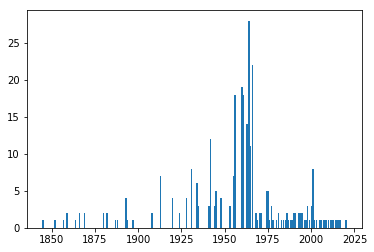

[1840.0,
 1845.0,
 1852.0,
 1857.0,
 1859.0,
 1864.0,
 1866.0,
 1869.0,
 1880.0,
 1882.0,
 1887.0,
 1888.0,
 1893.0,
 1894.0,
 1897.0,
 1908.0,
 1913.0,
 1920.0,
 1924.0,
 1928.0,
 1931.0,
 1934.0,
 1935.0,
 1941.0,
 1942.0,
 1944.0,
 1945.0,
 1948.0,
 1953.0,
 1955.0,
 1956.0,
 1960.0,
 1961.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1980.0,
 1981.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2020.0]

In [66]:
plt.bar(years[1:],years_ndarray[1:])
plt.show()
years

In [ ]:
data.head()

In [67]:
data[pandas.isnull(data['semantics+'])]

,left context,left context highlight,n,right context,right context highlight,source,date,predicat position,predicat,extra,semantics,semantics+,tense,person,number,form,date_,semantics+_
282,"Положение наше было крайне досадное, потому чт...","[бьёт], ему",ни шиша,", видишь его, да ничем не достанешь"".",NaN,Э. Любарский. Бедственная экспедиция // «Истор...,1894,l0,[бьёт],ему,NaN,NaN,present,3.0,1.0,NaN,1894.0,
283,"― А что же, он теперь открыл что-нибудь,",[открыл],ни шиша,.,NaN,В. П. Мещерский. Мои воспоминания,1897,l0,[открыл],NaN,NaN,NaN,past,3.0,1.0,m,1897.0,
284,Мы покончим все это дело сейчас. Я плачу за эт...,[плачу],ни шиша,больше. Доктор Макфейл улыбнулся.,NaN,"Сомерсет Моэм, И.Гурова. Дождь",1990,l0,[плачу],NaN,NaN,NaN,present,1.0,1.0,NaN,1990.0,
285,Очень ему жалко было семейство. ― А,[жалко],ни шиша,. Все ж застраховано.,NaN,Георгий Владимов. Три минуты молчания,1969,l0,[жалко],NaN,NaN,NaN,present,NaN,NaN,adverb,1969.0,
286,"Которое кое-что значит для того, кто его носит...",[значит],ни шиша,.,NaN,Иностранная литература: выпуски 1-4.,1998,l0,[значит],NaN,NaN,NaN,present,3.0,1.0,NaN,1998.0,
287,Объявили.,NaN,Ни шиша,. Минут сорок ждал в толчее.,NaN,Дмитрий Каралис. Автопортрет,1999,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.0,
288,"У нас каждый получает такие шиши, которые ему ...",[получает] шиши,ни шиша,"! - Значит, тебе столько положено.",NaN,umorist.ru,2000+,NaN,[получает],шиши,NaN,NaN,pr,3.0,1.0,NaN,2020.0,
289,"Зато понял, что",NaN,ни шиша,ей не сорок лет.,NaN,Алексей Иванов,2001,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.0,
290,"кто сказал, что он тестер?..",NaN,ни шиша,"подобного - он кинутый юзверь, выложивший свою...",подобного,livejournal.com,2008,0,NaN,подобного,NaN,NaN,NaN,NaN,NaN,NaN,2008.0,
291,"Да блин, Юль, представляешь, пять дней-пять но...",NaN,ни шиша,"!!!! Теперь во вторник на защиту идти, а в пят...",NaN,vk.com,2010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,


In [109]:
# 2. посчитать частотность каждой семантческой группы (без предиката - не семантическая) внутри всей выборки - pie chart. Отрисовать её частотность по годам.
#   1. Для каждого примера:
# for r in data[:2].iterrows():# iterate through rows
#     print(r, type(r), r.index(0), r)
#     Если тип есть в списке типов:
#       значение типа += 1
#     Если типа нет в списке типов:
#       добавить тип в список, приравняв его значение 1
from collections import Counter
semantic_type_freqs = Counter(data['semantics+']) # slice data across the semantics field
#   2. Считаем проценты от общего числа примеров:
#     Для каждой семантической группы:
#       процент этой семантической группы = значение семантической группы/общее число примеров*100%
#   3. Рисуем pie chart с соответствующими процентами, легендой

total = sum(list(semantic_type_freqs.values()))
semantic_type_percentages = list(map((lambda count: count/total*100), list(semantic_type_freqs.values())))
labels_w_percentages = [str(t)+ " " + ('%.1f' % p) + "%" for (t, p) in zip(semantic_type_freqs.keys(),semantic_type_percentages)]
labels_w_absolute_counts = [str(t)+ " " + str(c) for (t, c) in zip(semantic_type_freqs.keys(), semantic_type_freqs.values())]

In [110]:
labels_w_absolute_counts

['понимать 74',
 'воспринимать 16',
 'обладать 111',
 'обладать абс 26',
 'стоить 3',
 'делать 36',
 'пр 16',
 'nan 20']

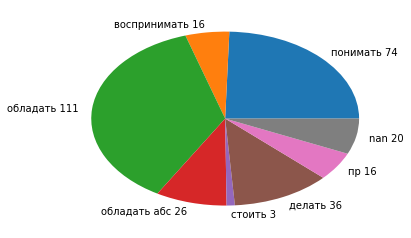

In [193]:

plt.pie([float(v) for v in semantic_type_freqs.values()], labels=labels_w_absolute_counts,
           autopct=None)
plt.show()

In [104]:
# import cufflinks
# pie=cufflinks.datagen.pie()

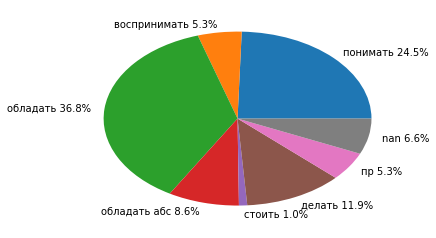

In [111]:

plt.pie([float(v) for v in semantic_type_freqs.values()], labels=labels,
           autopct=None)
plt.show()

In [127]:
data.head()

,left context,left context highlight,n,right context,right context highlight,source,date,predicat position,predicat,extra,semantics,semantics+,tense,person,number,form,date_,semantics+_
0,Из всей их беседы не извлек я,извлек,ни шиша,.,NaN,А. В. Дружинин. Дневник,1845,l,извлечь,NaN,NaN,понимать,present,3.0,1.0,NaN,1845.0,понимать
1,"Жаль Сая, а что же будет с новым главнокоманду...",смыслит,ни шиша,.,NaN,К. А. Скачков. Мой дневник,1852,l,смыслить,NaN,NaN,понимать,present,3.0,1.0,NaN,1852.0,понимать
2,"Впрочем, я",NaN,ни шиша,"не смыслю в моей болезни и не знаю наверно, чт...",смыслю,Ф. М. Достоевский. Записки из подполья,1864,r,смыслить,NaN,NaN,понимать,present,1.0,1.0,NaN,1864.0,понимать
3,"а въ коммерціи я, извините,",NaN,ни шиша,не смыслю.,смыслю,"Гр. А.. Кушелев-Безбородко,Григорий Евлампиеви...",1859,r,смыслить,NaN,NaN,понимать,present,1.0,1.0,NaN,1859.0,понимать
4,"― Был, брат, я у этих господ; звали они меня к...",NaN,ни шиша,нашего простого народа не понимают : пейзанчик...,понимают,А. Ф. Писемский. Люди сороковых годов,1869,r,понимать,NaN,NaN,понимать,present,3.0,2.0,NaN,1869.0,понимать


In [189]:
# 3. посчитать частотность l, r, l0, ambi, 0 всего и внутри каждой семантической группы. можно отрисовать по годам - всего
#   1. Собираем позицию предиката по типам:
#     Для каждого семантического типа:
#       Для каждого примера этого семантического типа:
#         Если такая позиция есть в списке позиций этого листа:
#           значение позиции += 1
#         Если такой позиции нет в списке позиций этого листа:
#           добавить позицию в список, приравняв её значение 1
dict_of_predicate_position_counters_by_type = {}
for t in semantic_types:
    dict_of_predicate_position_counters_by_type[t] = []
#    for r in data[data['semantics+']==t].itertuples():
    dict_of_predicate_position_counters_by_type[t] = Counter(data[data['semantics+']==t]['predicat position'])
    print(t, dict_of_predicate_position_counters_by_type[t])

#   2. Считаем проценты от общего числа примеров:
#     Для каждой семантической группы:
#       процент этой семантической группы = значение семантической группы/общее число примеров*100%

#  N.B.: нам не надо считать проценты вручную, потому что функция отрисовки pie chart уже умеет это делать.
# dict_of_position_percentages_by_type = {}
# for (t, counter) in dict_of_predicate_position_counters_by_type.items():
#     total = sum(counter.values())
#     dict_of_position_percentages_by_type[t] = [counter[pos]/total*100 for pos in counter.keys()]
    


понимать Counter({'r': 47, 'l': 22, 'l0': 2, '0': 1, 'rr': 1, 'ambi': 1})
воспринимать Counter({'r': 10, 'l': 5, 'l0': 1})
обладать Counter({'r': 46, 'l': 34, '0': 28, 'l0': 2, 'r+ambi': 1})
обладать абс Counter({'0': 10, 'l': 9, 'r': 6, nan: 1})
стоить Counter({'ambi': 3})
делать Counter({'r': 27, 'l': 9})
пр Counter({'r': 11, 'l': 3, '0': 1, 'l0': 1})
 Counter()


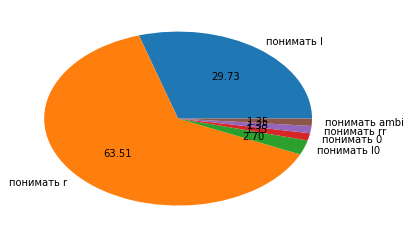

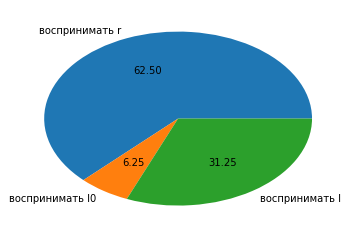

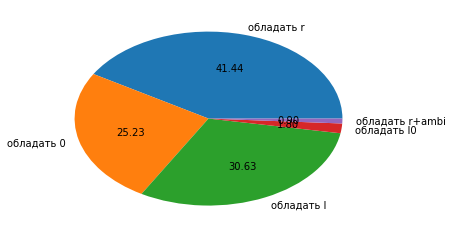

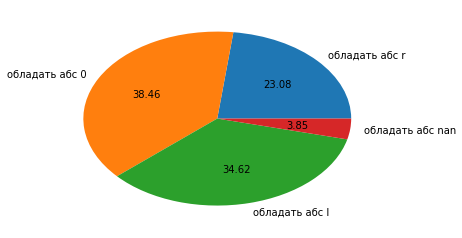

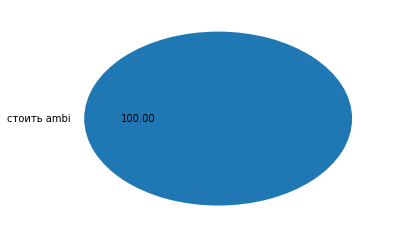

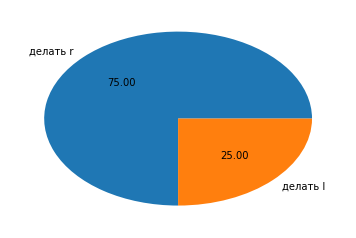

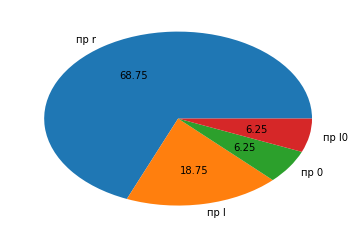

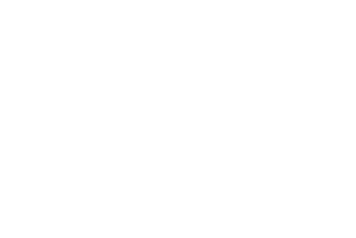

In [190]:
for (t, counter) in dict_of_predicate_position_counters_by_type.items():
    plt.pie([percentage for percentage in counter.values()],labels=[t + " " + str(position) for position in counter.keys()], autopct='%.2f')
    plt.show()

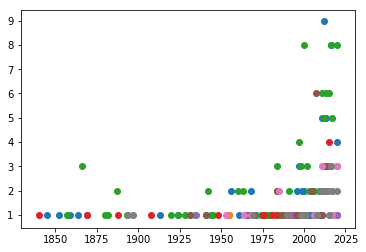

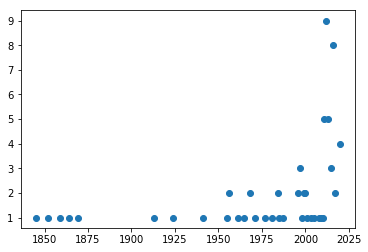

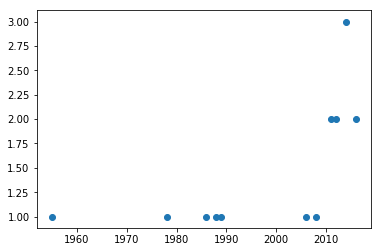

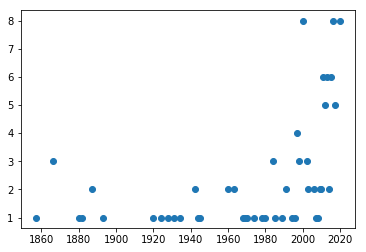

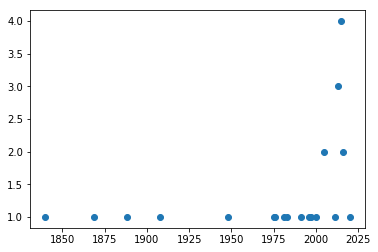

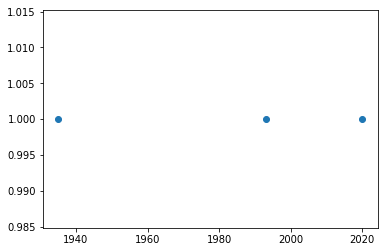

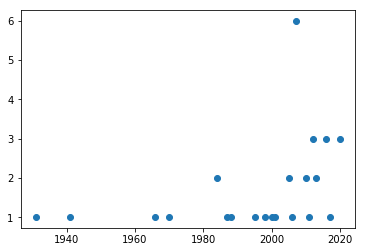

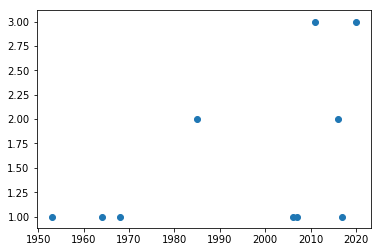

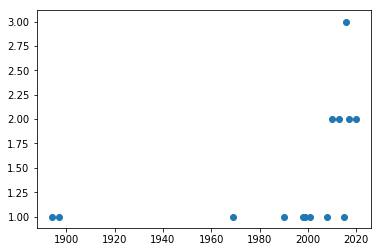

In [267]:


#   3. Рисуем pie chart с соответствующими процентами, легендой
#   4. Собираем даты позиций по типам:
#    Для каждого семантического типа:
#      Для каждой даты:
#        Для каждой позиции этого семантического типа:
#          Для каждого примера с этой датой:
#            Если пример с этой позициией:
#              Значение этой позиции для этой даты += 1
dict_of_date_counters_by_type = {}
for t in semantic_types:
#     print(t)
    date_counter = Counter()
    for r in data[data['semantics+_']==t].itertuples():
        # Counter class handles null counts gracefully.
        year = r[17]
        date_counter[year] += 1
#         print('*'*date_counter[year], year) 
    dict_of_date_counters_by_type[t] = date_counter
#   5. Нарисовать график:
#     По одной оси -   года, по другой - число примеров
#     График отдельного цвета/рисунка для каждой позиции группы (кроме стоить - она очень маленькая)
#     Отдельный график для каждой семантической группы
for idx, t in enumerate(semantic_types):
    counter = dict_of_date_counters_by_type[t]
    plt.scatter(list(counter.keys()), [int(n) for n in counter.values()])
#    plt.text(y=idx, s=t, x=0)

plt.show()

# Либо так, на отдельных холстах
for t in semantic_types:
    counter = dict_of_date_counters_by_type[t]
    plt.scatter(list(counter.keys()), [int(n) for n in counter.values()])

    plt.show()


In [279]:

# Оч неэффективно

# Оч некрасиво

# Я засыпун

# # !, [27 Apr 2017, 1:16]:
# ну и засыпай

# меня тоже рубит
# Галка, [27 Apr 2017, 1:16]:
# 4. посчитать частотность предикатов внутри групп, вывести топ 3 или топ 5
#   1. Собираем даты по типам:
#     Для каждого семантического типа:
#       Для каждого примера этого семантического типа:
dict_of_predicate_counts_by_type = {}
for t in semantic_types:
    c = Counter(data[data['semantics+_']==t]['predicat'])  # ой, надо почистить список возможных предикатов от NaN!
#         Если такой предикат есть в списке предикатов этого листа:
#           значение предиката += 1
#           значение предиката в общем списке дат += 1
#         Если такого предиката нет в списке предикатов этого листа:
#           добавить предикат в список, приравняв его значение 1
#           Если такого предиката нет в общем списке предикатов:
#             добавить предикат в список, приравняв его значение 1
#   2. Ищем максимумы каждого типа:
#     Для каждого семантического типа:
#       Сортировать (значения предикатов на этом листе) в порядке убывания, взять первые 3 различных числа
#       Вывести словарь "максимальных" предикатов с таким значением из этих предикатов
    print(t+":\t", c.most_common(4),
          #c,
          '\n')



понимать:	 [('понимать', 27), ('понять', 10), ('смыслить', 9), ('знать', 3)] 

воспринимать:	 [('видно', 7), ('видеть', 3), ('слышать', 2), ('слышно', 1)] 

обладать:	 [(nan, 28), ('не быть', 20), ('получить', 14), ('дать', 4)] 

обладать абс:	 [(nan, 11), ('не быть', 2), ('найти', 2), ('добиться', 1)] 

стоить:	 [('стоить провести', 1), ('стоить спороти', 1), ('стоить перепутать', 1)] 

делать:	 [('выходить', 6), ('сделать', 6), ('светить', 3), ('получаться', 3)] 

пр:	 [('вышишить', 1), ('схватывать', 1), ('чуять', 1), (nan, 1)] 

:	 [(nan, 8), ('[бьёт]', 1), ('[открыл]', 1), ('[плачу]', 1)] 



Counter({'present': 143, 'past': 66, nan: 50, 'fut': 42, 'pr': 1})
понимать Counter({'present': 54, 'past': 16, 'fut': 3, nan: 1})


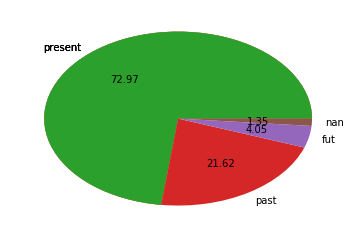

воспринимать Counter({'present': 14, 'past': 2})


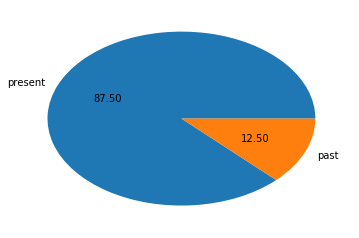

обладать Counter({'present': 36, nan: 28, 'past': 25, 'fut': 22})


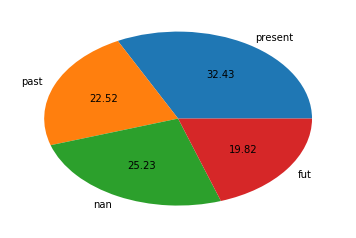

обладать абс Counter({nan: 11, 'present': 8, 'past': 4, 'fut': 3})


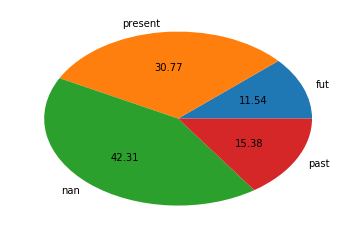

стоить Counter({'present': 3})


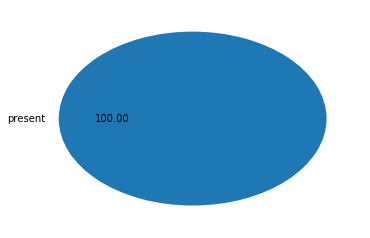

делать Counter({'present': 15, 'past': 11, 'fut': 10})


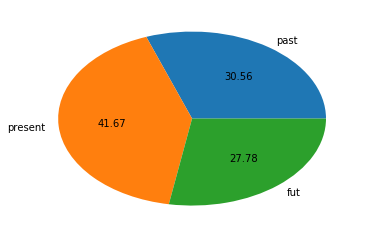

пр Counter({'present': 7, 'past': 4, 'fut': 4, nan: 1})


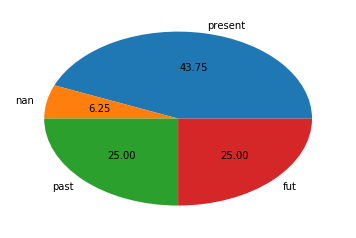

 Counter({nan: 9, 'present': 6, 'past': 4, 'pr': 1})


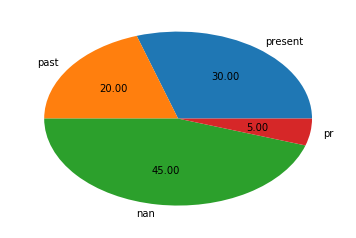

In [302]:
# Галка, [27 Apr 2017, 16:20]:
# 5. посчитать частотность различных грамматических форм внутри каждой группы и всего по выборке - число, лицо, время и форма предиката
#   1. Собираем формы по типам:
#     Для каждого семантического типа:
#       Для каждого примера этого семантического типа:
tense_values = data['tense'].unique()
tense_counter_across_all_types = Counter(data['tense'])
print(tense_counter_across_all_types)
for t in semantic_types:
    tense_counter = Counter(data[data['semantics+_']==t]['tense'])
#         Если tense == fut:
#           значение fut этого листа += 1
#           значение fut в общем += 1
    print(t, tense_counter)
    plt.pie(list(tense_counter.values()), labels=list(tense_counter.keys()), autopct='%.2f')
    plt.show()


#         Если tense == present:
#           значение present этого листа += 1
#           значение present в общем += 1
#         Если tense == past:
#           значение past этого листа += 1
#           значение past в общем += 1
#         Если number == 1:
#           значение sing этого листа += 1
#           значение sing в общем += 1
#         Если number == 2:
#           значение plur этого листа += 1
#           значение plur в общем += 1
#         Если person == 1:
#           значение 1p этого листа += 1
#           значение 1p в общем += 1
#         Если person == 2:
#           значение 2p этого листа += 1
#           значение 2p в общем += 1
#         Если person == 3:
#           значение 3p этого листа += 1
#           значение 3p в общем += 1
#         Если такая форма есть в списке форм этого листа:
#           значение формы += 1
#           значение формы в общем списке дат += 1
#         Если такой даты нет в списке дат этого листа:
#           добавить форму в список, приравняв её значение 1
#           Если такой формы нет в общем списке форм:
#             добавить форму в список, приравняв её значение 1
#   2. Считаем проценты от общего числа примеров:
#     Для каждой семантической группы:
#       Для каждой грамматической характеристики (лицо, число, время и форма)
#       процент этого значения этой характеристики = значение этой характеристики/общее число примеров в этой сем. группе*100%
#   3. Рисуем pie chart для каждой характеристики с соответствующими процентами, легендой

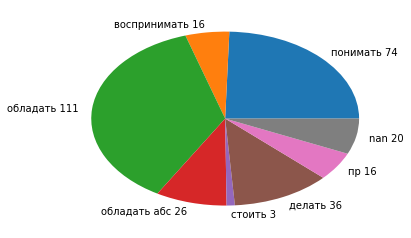